In [1]:
import pandas as pd

In [10]:
graph_feature = pd.read_csv("../graph_feature_add_full_page_rank.csv")
subscribe_count = pd.read_csv("../subscribe_count.csv")
also_chat_in_others_ratio = pd.read_csv("../also_chat_others_ratio.csv")

graph_feature = graph_feature[["Label", "full_PageRank","degree"]]
graph_feature.columns = ["streamer_name", "full_PageRank","degree"]

In [11]:
graph_feature.head()

,streamer_name,full_PageRank,degree
0,えま★おうがすと,0.005642,1
1,月ノ美兎,0.023508,81
2,える,0.005968,5
3,アンジュ・カトリーナ,0.020251,75
4,勇気ちひろ,0.010795,43


In [12]:
subscribe_count.head()

,streamer_name,subscriberCount
0,愛園愛美,124000
1,相羽ういは,163000
2,赤羽葉子,119000
3,朝日南アカネ,55300
4,飛鳥ひな,82700


In [13]:
also_chat_in_others_ratio.head()

,streamer_name,also_chat_others_ratio
0,えま★おうがすと,0.928485
1,える,0.943464
2,でびでび・でびる,0.934614
3,ましろ,0.921890
4,アルス・アルマル,0.940955


In [14]:
merged = pd.merge(subscribe_count, graph_feature)
merged = pd.merge(merged, also_chat_in_others_ratio)
merged.head()

,streamer_name,subscriberCount,full_PageRank,degree,also_chat_others_ratio
0,相羽ういは,163000,0.007128,10,0.953851
1,赤羽葉子,119000,0.009175,32,0.953748
2,天宮こころ,201000,0.014408,59,0.952983
3,雨森小夜,120000,0.009317,28,0.936192
4,アルス・アルマル,353000,0.013468,53,0.940955


In [15]:
# 散布図を描く
%config InlineBackend.figure_formats = {'png', 'retina'}
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, '次数中心性')

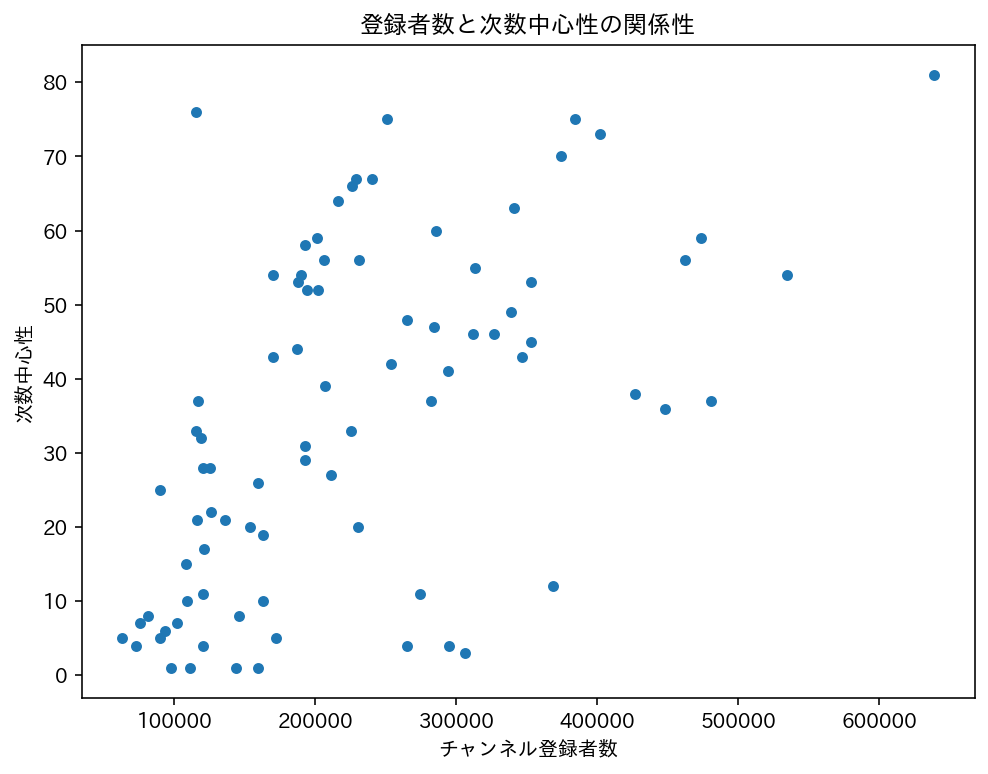

In [16]:
ax = merged.plot(kind="scatter", x="subscriberCount", y="degree", figsize=(8,6), title="登録者数と次数中心性の関係性")
ax.set_xlabel("チャンネル登録者数")
ax.set_ylabel("次数中心性")

Text(0, 0.5, 'PageRank')

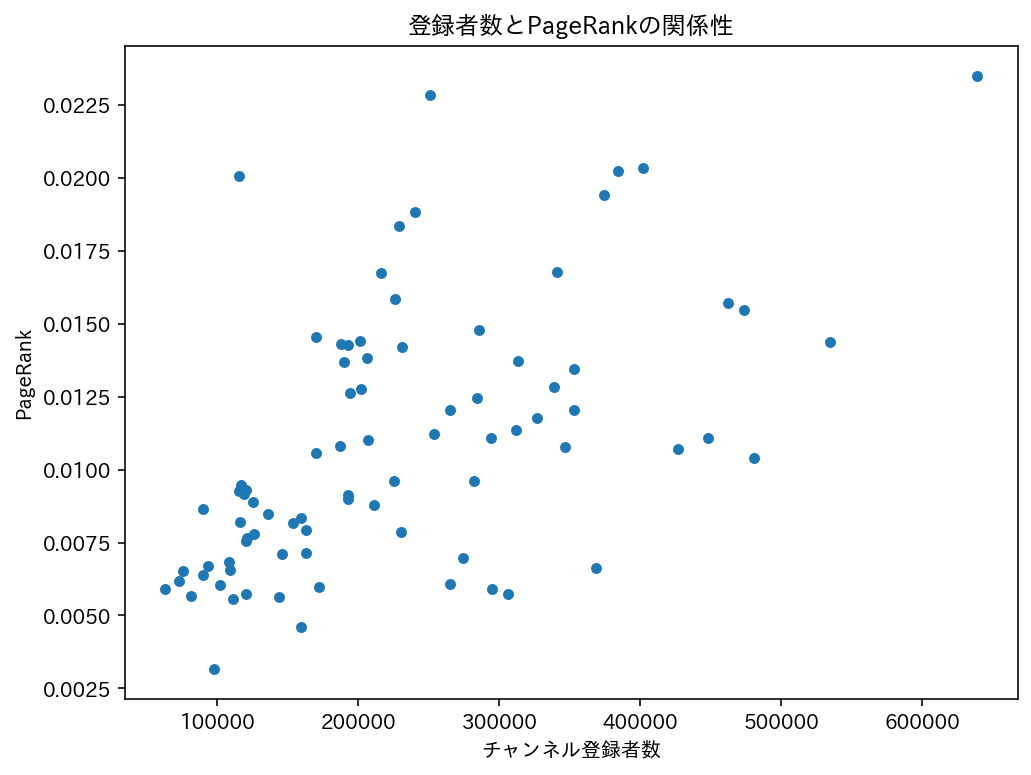

In [17]:
ax = merged.plot(kind="scatter", x="subscriberCount", y="full_PageRank", figsize=(8,6), title="登録者数とPageRankの関係性")
ax.set_xlabel("チャンネル登録者数")
ax.set_ylabel("PageRank")

Text(0, 0.5, '他配信チャット率')

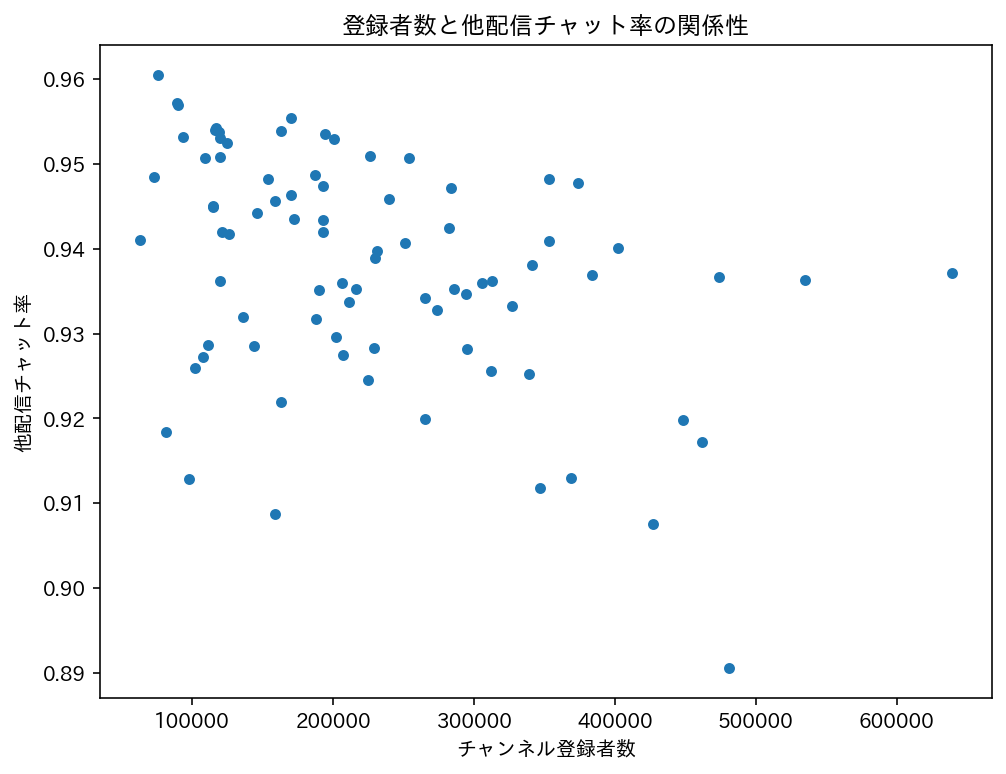

In [18]:
ax = merged.plot(kind="scatter", x="subscriberCount", y="also_chat_others_ratio", figsize=(8,6), title="登録者数と他配信チャット率の関係性")
ax.set_xlabel("チャンネル登録者数")
ax.set_ylabel("他配信チャット率")

In [19]:
# 相関係数を調べる
merged.corr()

,subscriberCount,full_PageRank,degree,also_chat_others_ratio
subscriberCount,1.000000,0.556458,0.547489,-0.403961
full_PageRank,0.556458,1.000000,0.963704,0.076637
degree,0.547489,0.963704,1.000000,0.062316
also_chat_others_ratio,-0.403961,0.076637,0.062316,1.000000
